In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd

# Define the list of FAANG ticker symbols
tickers = ['AAPL', 'AMZN', 'NFLX', 'GOOGL']

# Set the start and end dates for the historical data
datetime_str = '06/17/23'

# Set if hourly or not
hourly = True

# Set if with processing or without
process = False

end_date = datetime.strptime(datetime_str, '%m/%d/%y')
#datetime.datetime.now().strftime('%Y-%m-%d')
if hourly == True:
  end_date = datetime.now()
  start_date = (datetime.now() - timedelta(days=729)).strftime('%Y-%m-%d')
else:
  start_date = (end_date - timedelta(days=30*365)).strftime('%Y-%m-%d')

# Create an empty dataframe to store the stock data
combined_data_open = pd.DataFrame()
combined_data_close = pd.DataFrame()
combined_data_high = pd.DataFrame()
combined_data_low = pd.DataFrame()
combined_data_vol = pd.DataFrame()
combined_data_adj_cls = pd.DataFrame()
combined_data = pd.DataFrame()

# Download historical stock data for each ticker and combine into a single dataframe
for ticker in tickers:
    print(ticker)
    if hourly == True:
      data = yf.download(ticker, start=start_date, end=end_date, interval = '1h')
    else:
      data = yf.download(ticker, start=start_date, end=end_date)
    data.columns = ticker+"_"+data.columns  # Add a column to identify the ticker
    if combined_data_open.shape[0] ==0:
      combined_data = data
      combined_data_adj_cls = data[ticker+"_Adj Close"]
      combined_data_open = data[ticker+"_Open"]
      combined_data_close = data[ticker+"_Close"]
      combined_data_high = data[ticker+"_High"]
      combined_data_low = data[ticker+"_Low"]
      combined_data_vol = data[ticker+"_Volume"]
    else:
      combined_data = pd.merge(combined_data, data, left_index=True, right_index=True)
      combined_data_open = pd.merge(combined_data_open, data[ticker+"_Open"], left_index=True, right_index=True)
      combined_data_adj_cls = pd.merge(combined_data_adj_cls, data[ticker+"_Adj Close"], left_index=True, right_index=True)
      combined_data_close = pd.merge(combined_data_close, data[ticker+"_Close"], left_index=True, right_index=True)
      combined_data_high = pd.merge(combined_data_high, data[ticker+"_High"], left_index=True, right_index=True)
      combined_data_low = pd.merge(combined_data_low, data[ticker+"_Low"], left_index=True, right_index=True)
      combined_data_vol = pd.merge(combined_data_vol, data[ticker+"_Volume"], left_index=True, right_index=True)


AAPL
[*********************100%***********************]  1 of 1 completed
AMZN
[*********************100%***********************]  1 of 1 completed
NFLX
[*********************100%***********************]  1 of 1 completed
GOOGL
[*********************100%***********************]  1 of 1 completed


In [39]:
combined_data_adj_cls.shape

(3499, 4)

In [40]:
combined_data_adj_cls.describe()

,AAPL_Adj Close,AMZN_Adj Close,NFLX_Adj Close,GOOGL_Adj Close
count,3499.000000,3499.000000,3499.000000,3499.000000
mean,154.838576,133.403835,380.744170,118.964232
std,13.337225,30.846028,149.532380,18.519532
min,124.570000,81.830002,165.970001,83.410004
25%,145.482506,105.040997,249.209999,102.840000
50%,152.049301,126.605202,343.404510,117.758499
75%,165.639999,165.185257,519.304993,136.491631
max,186.179993,188.314499,693.096680,150.145996


1
2
3
4


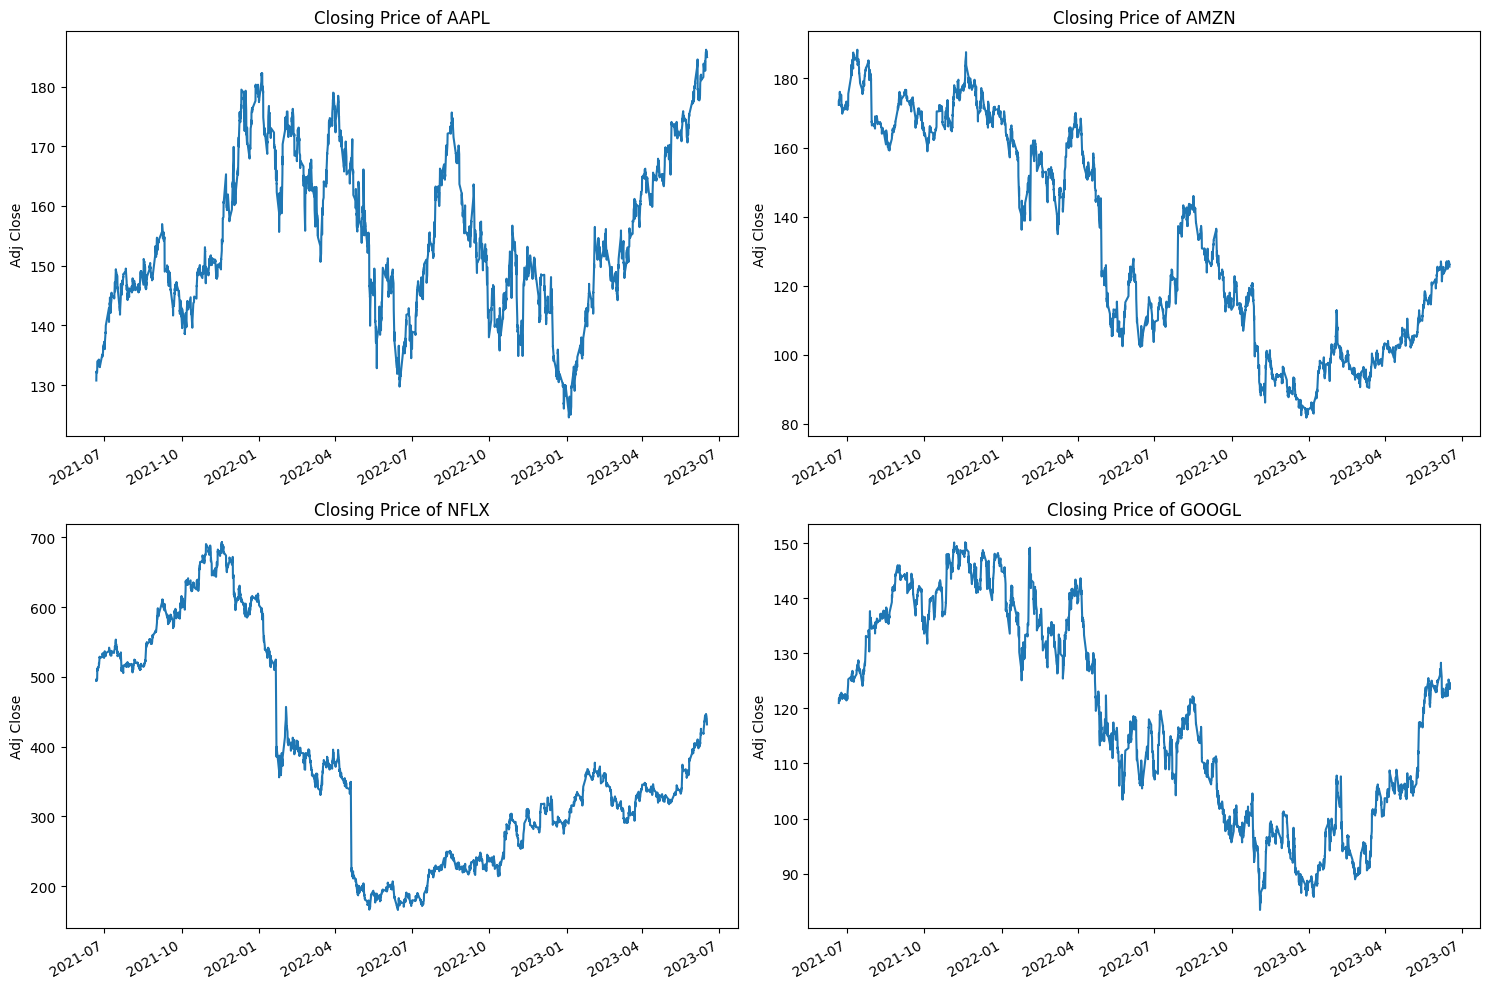

In [41]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(tickers, 1):
    print(i)
    plt.subplot(2, 2, i)
    combined_data[company+'_Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tickers[i - 1]}")

plt.tight_layout()

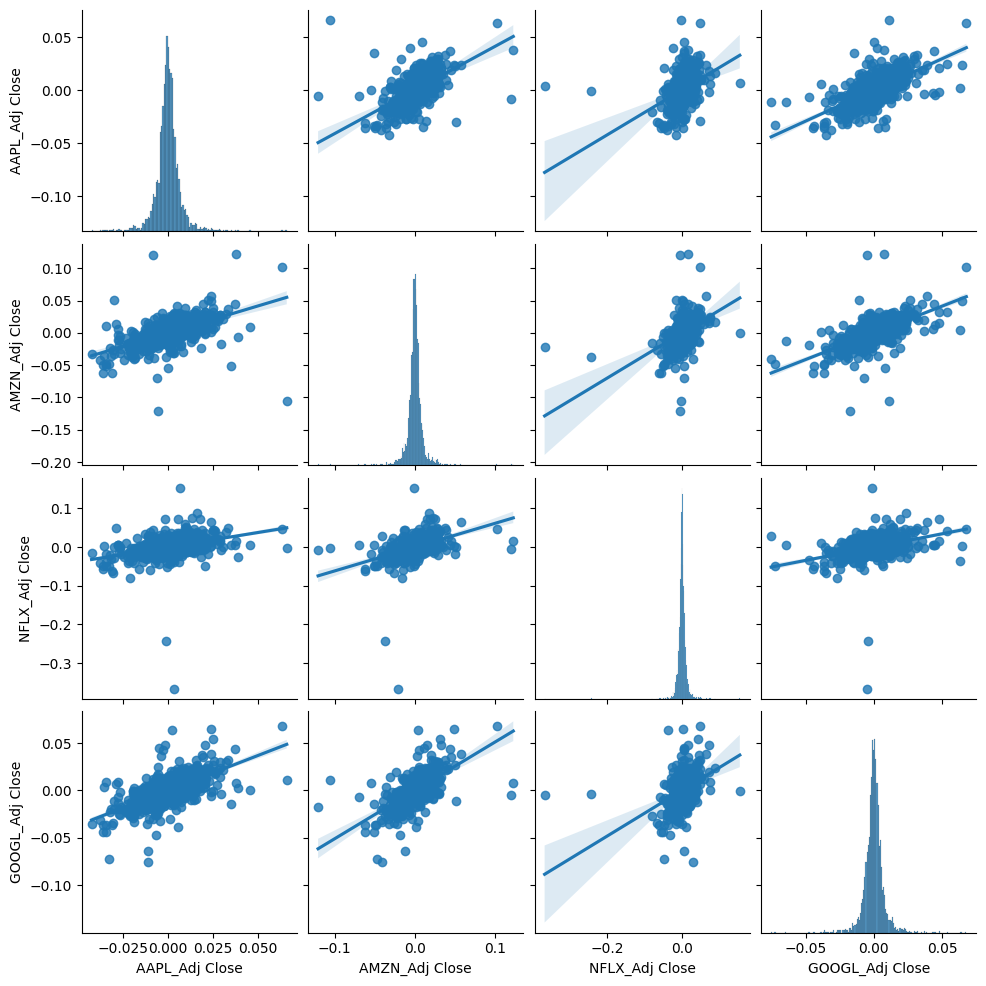

In [42]:
# Grab all the closing prices for the tech stock list into one DataFrame
tech_rets = combined_data_adj_cls.pct_change()
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')


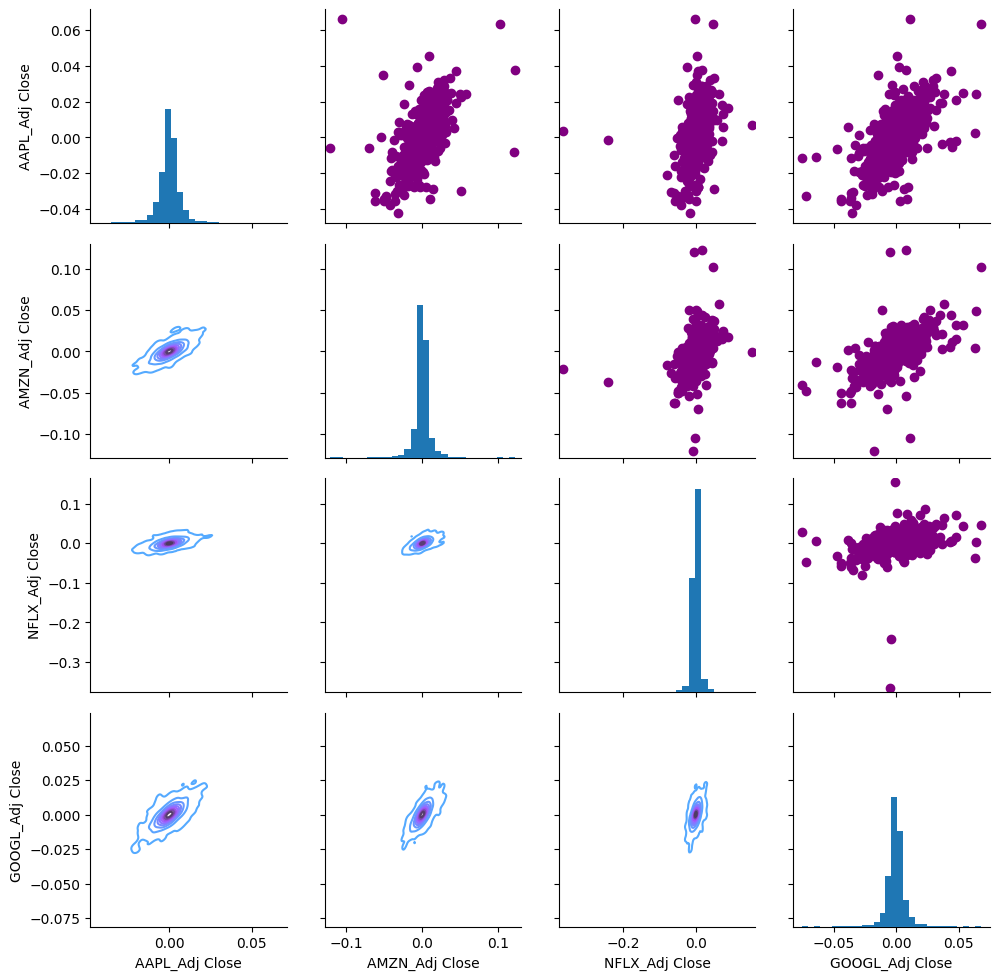

In [43]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

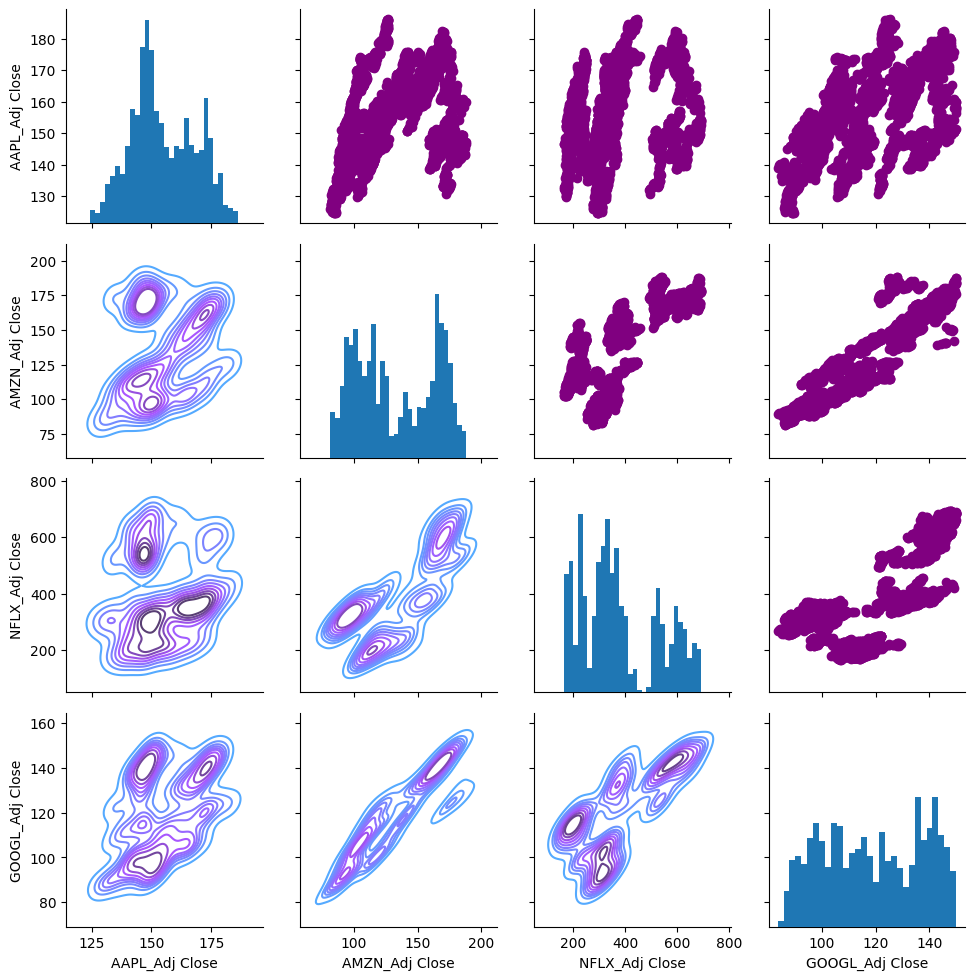

In [44]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(combined_data_adj_cls)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

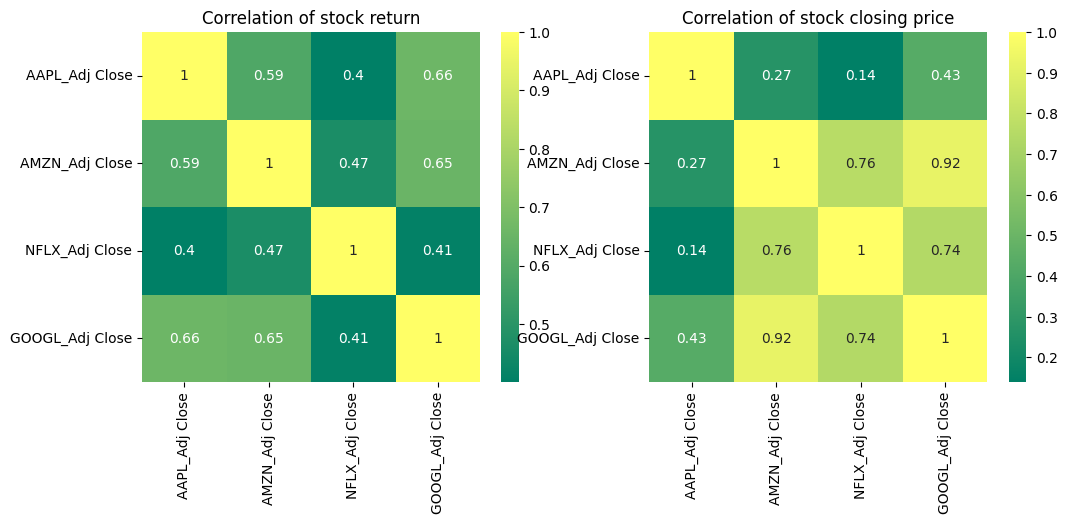

In [45]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(combined_data_adj_cls.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

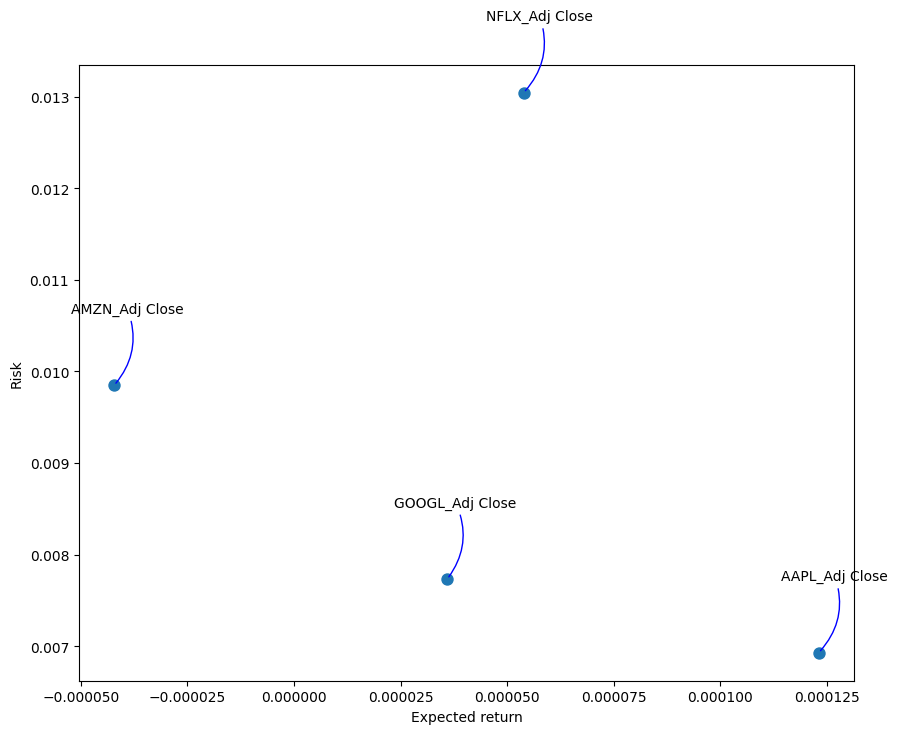

In [46]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [47]:
!apt-get install openjdk-8-jdk -qq > /dev/null
!pip install h2o -qq

In [48]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

import matplotlib.pyplot as plt
from scipy import stats


%matplotlib inline

In [49]:
combined_data_adj_cls

,AAPL_Adj Close,AMZN_Adj Close,NFLX_Adj Close,GOOGL_Adj Close
Datetime,,,,
2021-06-21 09:30:00-04:00,130.759995,172.338242,494.859985,120.962997
2021-06-21 10:30:00-04:00,131.610001,173.344757,495.570007,121.664001
2021-06-21 11:30:00-04:00,132.110001,173.596252,494.277496,121.426498
2021-06-21 12:30:00-04:00,132.100006,173.128250,494.130005,121.281799
2021-06-21 13:30:00-04:00,132.199997,173.298492,495.000000,121.768509
...,...,...,...,...
2023-06-16 11:30:00-04:00,185.730103,126.500000,438.790009,124.690002
2023-06-16 12:30:00-04:00,185.800003,126.360001,437.029999,124.529999
2023-06-16 13:30:00-04:00,185.309998,126.089996,436.279999,124.235001


In [50]:
combined_data_adj_cls.reset_index(inplace=True, drop = True)

In [51]:
def preprocess(data):
  df2 = data.copy()
  num_lags = 3 # number of lags and window lenghts for mean aggregation
  delay = 1 # predict target one step ahead
  for column in df2:
      for lag in range(1,num_lags+1):
          df2[column + '_lag' + str(lag)] = df2[column].shift(lag*-1-(delay-1))
          if column != 'wnd_dir':
              df2[column + '_avg_window_length' + str(lag+1)] = df2[column].shift(-1-(delay-1)).rolling(window=lag+1,center=False).mean().shift(1-(lag+1))

  df2.dropna(inplace=True)

  mask = (df2.columns.str.contains('GOOGL_Adj Close') | df2.columns.str.contains('lag') | df2.columns.str.contains('window'))
  df_processed = df2[df2.columns[mask]]
  return df_processed

# the columns in the processed dataframe
if process ==True:
  df_processed = preprocess(combined_data_adj_cls)
else:
  df_processed = combined_data_adj_cls

In [52]:
df_processed.head()

,AAPL_Adj Close,AMZN_Adj Close,NFLX_Adj Close,GOOGL_Adj Close
0,130.759995,172.338242,494.859985,120.962997
1,131.610001,173.344757,495.570007,121.664001
2,132.110001,173.596252,494.277496,121.426498
3,132.100006,173.128250,494.130005,121.281799
4,132.199997,173.298492,495.000000,121.768509


In [53]:
df_train = df_processed.loc[:int(0.8*df_processed.shape[0]),:]
df_test = df_processed.loc[int(0.8*df_processed.shape[0]):,:]

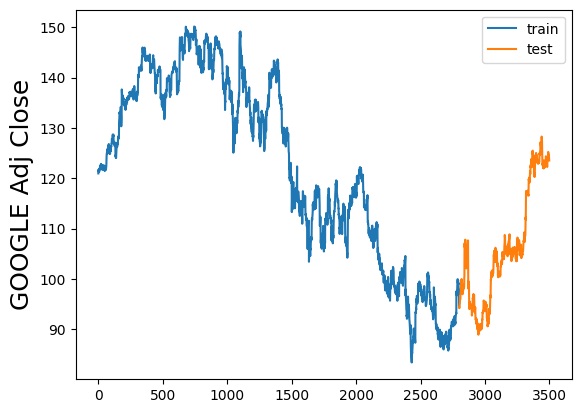

In [54]:
plt.plot(df_train.index,df_train['GOOGL_Adj Close'])
plt.plot(df_test.index,df_test['GOOGL_Adj Close'])
plt.ylabel('GOOGLE Adj Close',fontsize=18)
plt.legend(['train','test'])
plt.show()

In [55]:
h2o.init(nthreads=-1)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 26 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 20 days
H2O_cluster_name:,H2O_from_python_unknownUser_vu2jnw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.758 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [56]:
hf_train = h2o.H2OFrame(df_train)
hf_test = h2o.H2OFrame(df_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [57]:
hf_train.describe()

Rows:2800
Cols:4

,AAPL_Adj Close,AMZN_Adj Close,NFLX_Adj Close,GOOGL_Adj Close
type,real,real,real,real
mins,124.56999969482422,81.83000183105469,165.97000122070312,83.41000366210938
mean,152.89670139040277,140.43059035982427,389.34701893942656,122.15131170000363
maxs,182.25,188.3144989013672,693.0966796875,150.14599609375
sigma,13.014726445721035,30.279841269117092,165.1651274837981,18.627561825371618
zeros,0,0,0,0
missing,0,0,0,0
0,130.75999450683594,172.33824157714844,494.8599853515625,120.96299743652344
1,131.61000061035156,173.34475708007812,495.5700073242187,121.66400146484376
2,132.11000061035156,173.59625244140625,494.2774963378906,121.42649841308594


In [58]:
y = 'GOOGL_Adj Close'
X = hf_train.columns
X.remove(y)

In [59]:
aml = H2OAutoML(max_runtime_secs = -1,
                seed = 42)
aml.train(x = X,
          y = y,
          training_frame = hf_train,
          leaderboard_frame = hf_test)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),0/1
# DeepLearning base models (used / total),0/1
# DRF base models (used / total),1/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [60]:
lb = aml.leaderboard

lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_2_20230618_84946,4.58671,21.0379,3.67579,0.0438703,21.0379
XGBoost_grid_1_AutoML_2_20230618_84946_model_43,4.63458,21.4794,3.70232,0.0443105,21.4794
XGBoost_grid_1_AutoML_2_20230618_84946_model_12,4.86803,23.6977,3.81098,0.0479673,23.6977
GBM_lr_annealing_selection_AutoML_2_20230618_84946_select_model,4.92387,24.2445,3.85313,0.0477873,24.2445
XGBoost_grid_1_AutoML_2_20230618_84946_model_79,4.96255,24.6269,4.13977,0.0478344,24.6269
XGBoost_grid_1_AutoML_2_20230618_84946_model_59,5.01645,25.1648,4.25884,0.0462728,25.1648
GBM_grid_1_AutoML_2_20230618_84946_model_203,5.19876,27.0271,4.15723,0.0506482,27.0271
XGBoost_grid_1_AutoML_2_20230618_84946_model_33,5.20398,27.0814,4.27236,0.0504774,27.0814
XGBoost_grid_1_AutoML_2_20230618_84946_model_74,5.22135,27.2625,4.34194,0.0498091,27.2625
GBM_grid_1_AutoML_2_20230618_84946_model_45,5.29978,28.0877,4.18081,0.0512793,28.0877


In [61]:
# Get leaderboard with all possible columns
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_4_AutoML_2_20230618_84946,4.58671,21.0379,3.67579,0.0438703,21.0379,447,0.06875,StackedEnsemble
XGBoost_grid_1_AutoML_2_20230618_84946_model_43,4.63458,21.4794,3.70232,0.0443105,21.4794,504,0.007685,XGBoost
XGBoost_grid_1_AutoML_2_20230618_84946_model_12,4.86803,23.6977,3.81098,0.0479673,23.6977,907,0.011749,XGBoost
GBM_lr_annealing_selection_AutoML_2_20230618_84946_select_model,4.92387,24.2445,3.85313,0.0477873,24.2445,318,0.023805,GBM
XGBoost_grid_1_AutoML_2_20230618_84946_model_79,4.96255,24.6269,4.13977,0.0478344,24.6269,3326,0.015381,XGBoost
XGBoost_grid_1_AutoML_2_20230618_84946_model_59,5.01645,25.1648,4.25884,0.0462728,25.1648,481,0.012664,XGBoost
GBM_grid_1_AutoML_2_20230618_84946_model_203,5.19876,27.0271,4.15723,0.0506482,27.0271,1197,0.096699,GBM
XGBoost_grid_1_AutoML_2_20230618_84946_model_33,5.20398,27.0814,4.27236,0.0504774,27.0814,1183,0.01029,XGBoost
XGBoost_grid_1_AutoML_2_20230618_84946_model_74,5.22135,27.2625,4.34194,0.0498091,27.2625,654,0.010192,XGBoost
GBM_grid_1_AutoML_2_20230618_84946_model_45,5.29978,28.0877,4.18081,0.0512793,28.0877,499,0.028098,GBM


In [62]:
lb_df = lb.as_data_frame()

In [63]:
lb_df['model_id'][:10]

0    StackedEnsemble_BestOfFamily_4_AutoML_2_202306...
1      XGBoost_grid_1_AutoML_2_20230618_84946_model_43
2      XGBoost_grid_1_AutoML_2_20230618_84946_model_12
3    GBM_lr_annealing_selection_AutoML_2_20230618_8...
4      XGBoost_grid_1_AutoML_2_20230618_84946_model_79
5      XGBoost_grid_1_AutoML_2_20230618_84946_model_59
6         GBM_grid_1_AutoML_2_20230618_84946_model_203
7      XGBoost_grid_1_AutoML_2_20230618_84946_model_33
8      XGBoost_grid_1_AutoML_2_20230618_84946_model_74
9          GBM_grid_1_AutoML_2_20230618_84946_model_45
Name: model_id, dtype: object

In [64]:
# lst = lb_df['model_id'][:10]

# # Get a specific model by model ID
# for i,d in enumerate(lst):
#   print(i)
#   m = h2o.get_model(d)
#   saved_model = h2o.save_model(m, path = "/content/drive/MyDrive/AutoML/AutoML_no_process_H2O", force=True)

In [65]:
# x = lb.as_data_frame()
# x.to_csv('/content/drive/MyDrive/AutoML/AutoML_no_process_H2O/AutoML_no_processH2Oleaderboard.csv')